<a href="https://colab.research.google.com/github/roshan-pasha/Machine-Learning/blob/master/Airaccident_HackerEarth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt


In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
from google.colab import files
upload_train = files.upload()

Saving train.csv to train.csv


In [0]:
upload_test = files.upload()

Saving test.csv to test.csv


In [0]:
upload_submission = files.upload()

Saving sample_submission.csv to sample_submission.csv


In [0]:
import io
train = pd.read_csv(io.BytesIO(upload_train['train.csv']))
test = pd.read_csv(io.BytesIO(upload_test['test.csv']))
submission = pd.read_csv(io.BytesIO(upload_submission['sample_submission.csv']))

In [0]:
train.head()

Severity  ...  Accident_ID
0                Minor_Damage_And_Injuries  ...         7570
1                Minor_Damage_And_Injuries  ...        12128
2        Significant_Damage_And_Fatalities  ...         2181
3  Significant_Damage_And_Serious_Injuries  ...         5946
4        Significant_Damage_And_Fatalities  ...         9054

[5 rows x 12 columns]

In [0]:
test.head()

Safety_Score  Days_Since_Inspection  ...  Adverse_Weather_Metric  Accident_ID
0     19.497717                     16  ...                0.069692            1
1     58.173516                     15  ...                0.002777           10
2     33.287671                     15  ...                0.004316           14
3      3.287671                     21  ...                0.199990           17
4     10.867580                     18  ...                0.483696           21

[5 rows x 11 columns]

In [0]:
submission.head()

Accident_ID                                 Severity
0            1                Minor_Damage_And_Injuries
1           10                Highly_Fatal_And_Damaging
2           14                Highly_Fatal_And_Damaging
3           17  Significant_Damage_And_Serious_Injuries
4           21                Minor_Damage_And_Injuries

In [0]:
train.Severity.unique()

array(['Minor_Damage_And_Injuries', 'Significant_Damage_And_Fatalities',
       'Significant_Damage_And_Serious_Injuries',
       'Highly_Fatal_And_Damaging'], dtype=object)

In [0]:
train['Severity'] = train['Severity'].map({'Minor_Damage_And_Injuries': 0, 'Significant_Damage_And_Fatalities':1,
       'Significant_Damage_And_Serious_Injuries':2,
       'Highly_Fatal_And_Damaging': 3})

In [0]:
train.Severity.value_counts()

3    3049
2    2729
0    2527
1    1695
Name: Severity, dtype: int64

In [0]:
train.isna().sum()

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Severity                   10000 non-null int64
Safety_Score               10000 non-null float64
Days_Since_Inspection      10000 non-null int64
Total_Safety_Complaints    10000 non-null int64
Control_Metric             10000 non-null float64
Turbulence_In_gforces      10000 non-null float64
Cabin_Temperature          10000 non-null float64
Accident_Type_Code         10000 non-null int64
Max_Elevation              10000 non-null float64
Violations                 10000 non-null int64
Adverse_Weather_Metric     10000 non-null float64
Accident_ID                10000 non-null int64
dtypes: float64(6), int64(6)
memory usage: 937.6 KB


In [0]:
train.describe()

Severity  Safety_Score  ...  Adverse_Weather_Metric   Accident_ID
count  10000.000000  10000.000000  ...            10000.000000  10000.000000
mean       1.630000     41.876406  ...                0.255635   6266.554200
std        1.161221     16.138072  ...                0.381128   3610.170288
min        0.000000      0.000000  ...                0.000316      2.000000
25%        0.000000     30.593607  ...                0.012063   3139.750000
50%        2.000000     41.278539  ...                0.074467   6280.500000
75%        3.000000     52.511416  ...                0.354059   9391.500000
max        3.000000    100.000000  ...                2.365378  12500.000000

[8 rows x 12 columns]

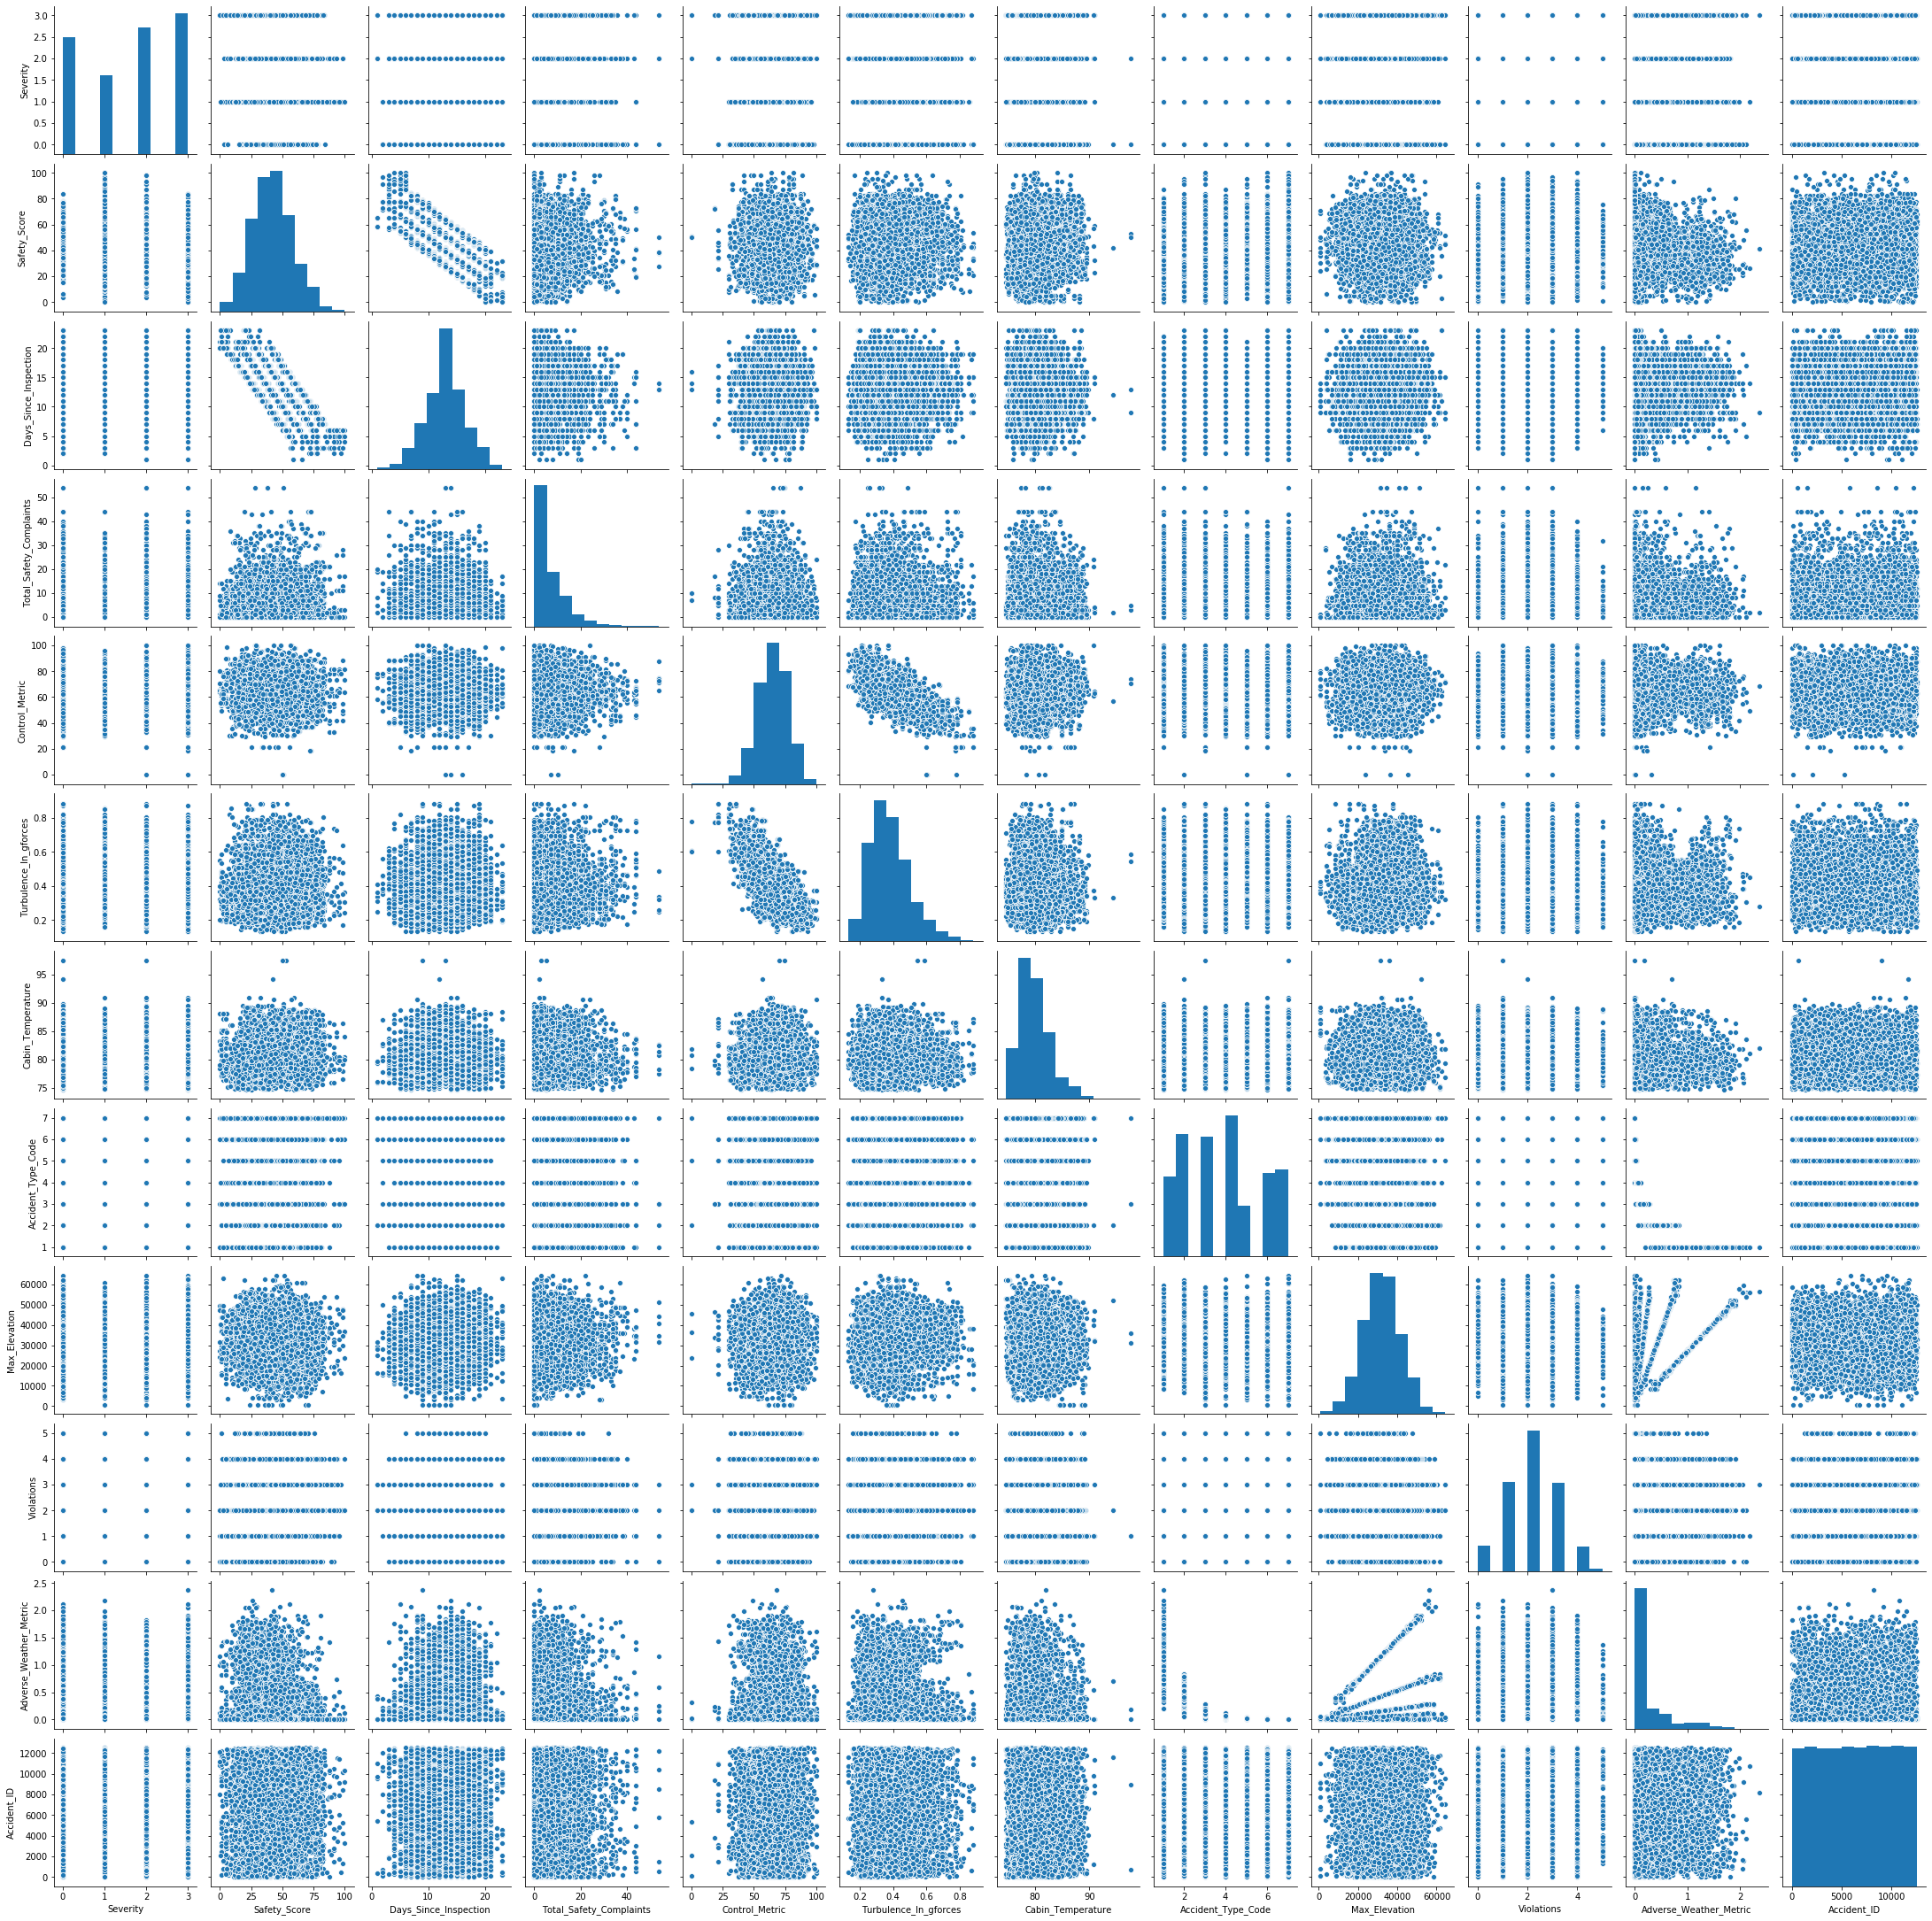

In [0]:
sns.pairplot(train)

In [0]:
# train.columns                 #'Adverse_Weather_Metric''Accident_Type_Code'Total_Safety_Complaints'Severity'

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

In [0]:
# train['Accident_Type_Code'][train['Accident_Type_Code'] == 0].count()

0

In [0]:
# train['Adverse_Weather_Metric'] = np.log(train['Adverse_Weather_Metric'])

In [0]:
# train['Accident_Type_Code'] = np.log(train['Accident_Type_Code'])

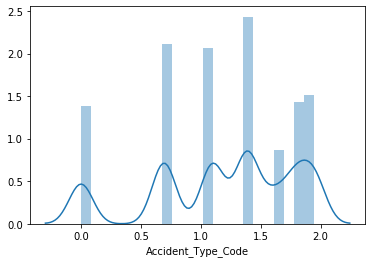

In [0]:
# # sns.distplot(train['Adverse_Weather_Metric'])
# sns.distplot(train['Accident_Type_Code'])

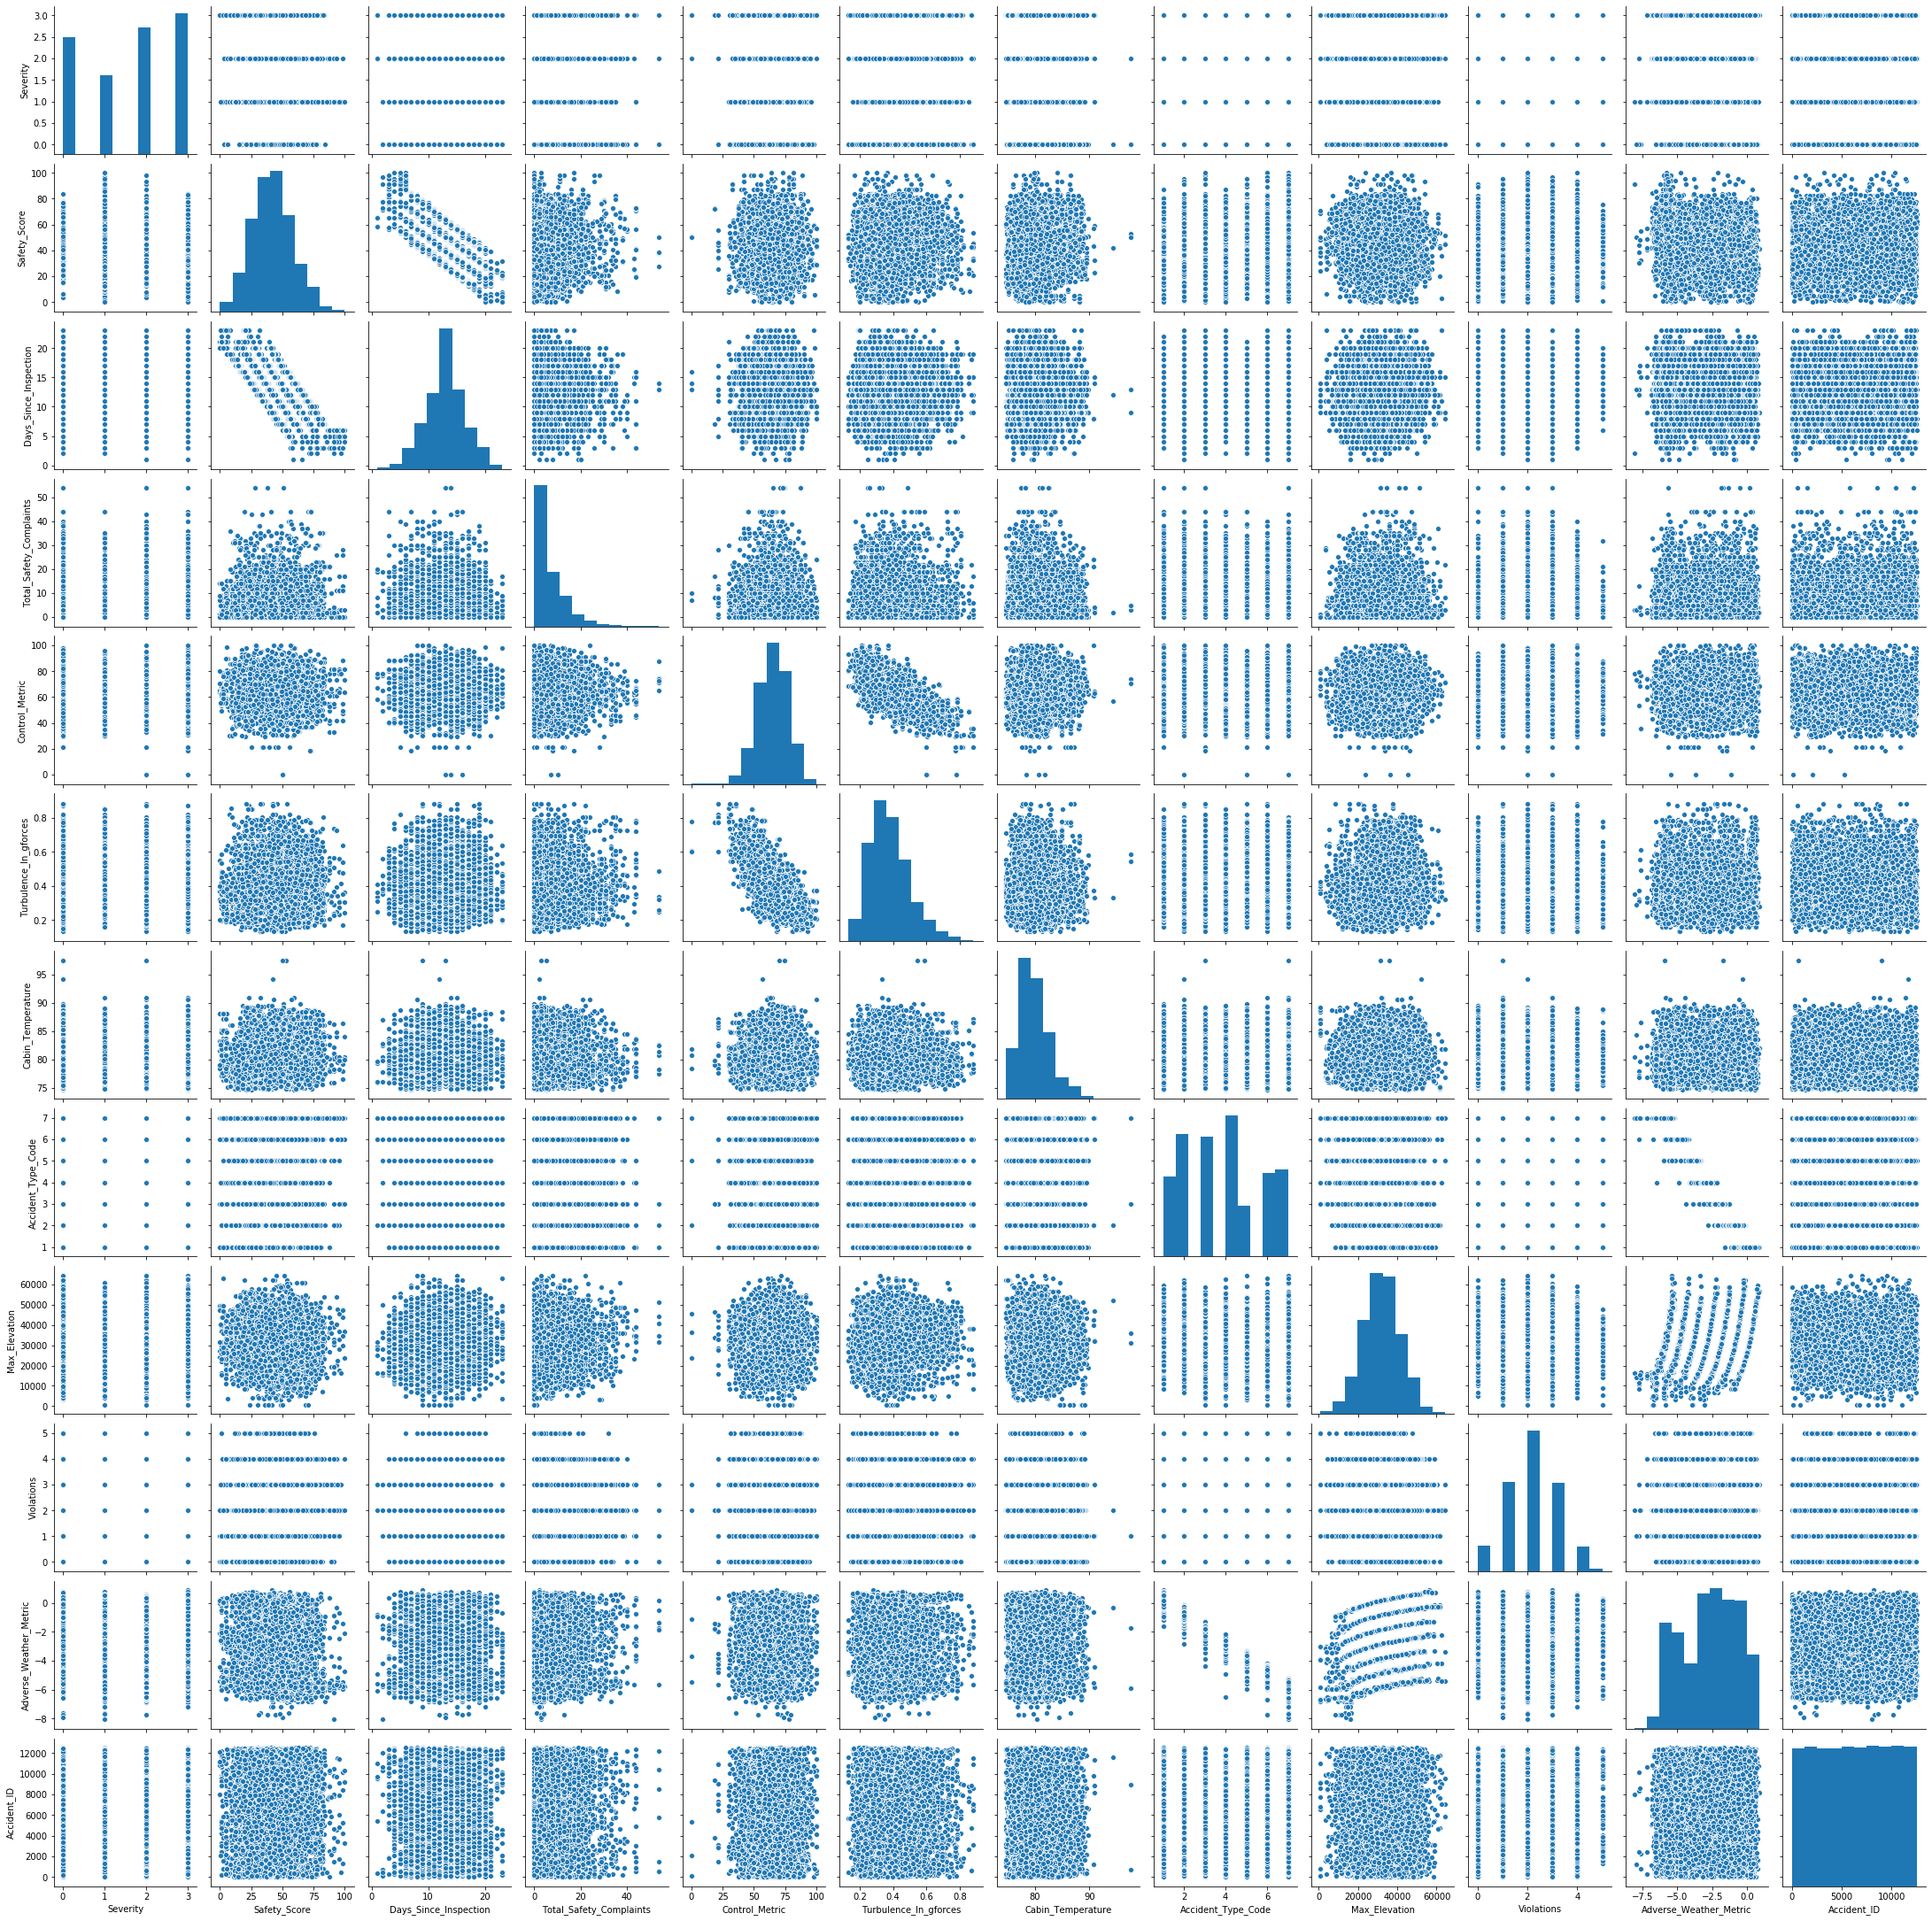

In [0]:
# sns.pairplot(train)

In [0]:
# train.Accident_Type_Code.unique()

array([2, 7, 3, 4, 1, 6, 5])

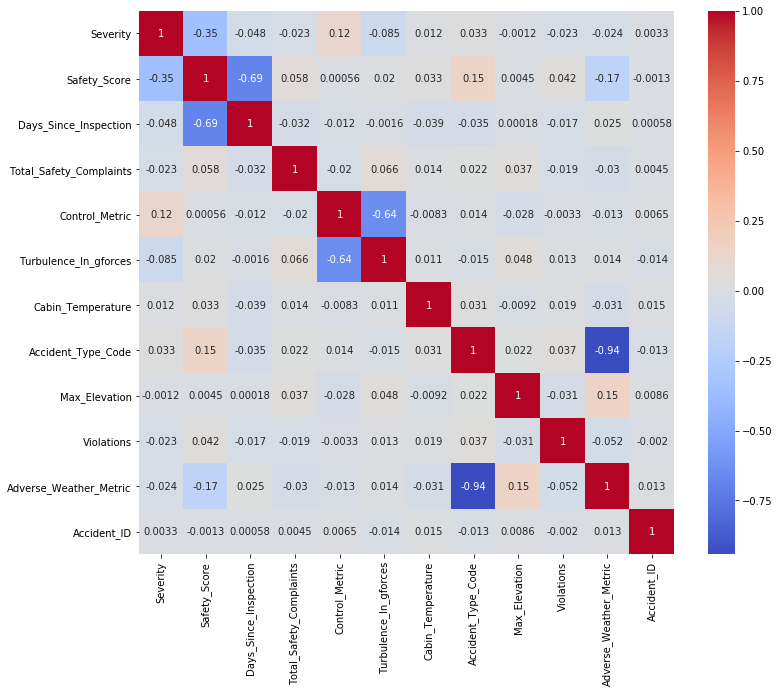

In [0]:
# plt.subplots(figsize=(12,10))
# sns.heatmap(data = train.corr(),annot=True,cmap='coolwarm')

In [0]:
# train.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

In [0]:
# train.sample(3)

Severity  Safety_Score  ...  Adverse_Weather_Metric  Accident_ID
1015         0     45.799087  ...                0.029688         7361
4577         0     33.059361  ...                0.262284         1706
7411         3     57.990868  ...                0.355224          918

[3 rows x 12 columns]

In [0]:
# scaling_feature=[feature for feature in train.columns if feature not in ['Accident_ID','Severity'] ]
# len(scaling_feature)

10

In [0]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(train[scaling_feature])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
# scaler.transform(train[scaling_feature])

array([[0.49223744, 0.59090909, 0.40740741, ..., 0.48063219, 0.6       ,
        0.17929156],
       [0.62465753, 0.40909091, 0.5       , ..., 0.39695322, 0.4       ,
        0.14884749],
       [0.63059361, 0.54545455, 0.2962963 , ..., 0.60563743, 0.6       ,
        0.00128854],
       ...,
       [0.27853881, 0.72727273, 0.01851852, ..., 0.51902316, 0.6       ,
        0.07097345],
       [0.56210046, 0.31818182, 0.        , ..., 0.61432501, 0.4       ,
        0.01102064],
       [0.5       , 0.54545455, 0.05555556, ..., 0.39664773, 0.4       ,
        0.00706936]])

In [0]:
# # transform the train and test set, and add on the Id and SalePrice variables
# data = pd.concat([train[['Accident_ID', 'Severity']].reset_index(drop=True),
#                     pd.DataFrame(scaler.transform(train[scaling_feature]), columns=scaling_feature)],
#                     axis=1)

In [0]:
# data.head()

Accident_ID  Severity  ...  Violations  Adverse_Weather_Metric
0         7570         0  ...         0.6                0.179292
1        12128         0  ...         0.4                0.148847
2         2181         1  ...         0.6                0.001289
3         5946         2  ...         0.2                0.089390
4         9054         1  ...         0.4                0.074656

[5 rows x 12 columns]

In [0]:
# #Feature Scaling for Test data
# scaling_feature=[feature for feature in test.columns if feature not in ['Accident_ID'] ]
# len(scaling_feature)

10

In [0]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(test[scaling_feature])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
# scaler.transform(train[scaling_feature])

array([[0.49223744, 0.59090909, 0.40740741, ..., 0.49612783, 0.6       ,
        0.17927384],
       [0.62465753, 0.40909091, 0.5       , ..., 0.40975104, 0.4       ,
        0.14882911],
       [0.63059361, 0.54545455, 0.2962963 , ..., 0.62516326, 0.6       ,
        0.00126697],
       ...,
       [0.27853881, 0.72727273, 0.01851852, ..., 0.53575653, 0.6       ,
        0.07095339],
       [0.56210046, 0.31818182, 0.        , ..., 0.63413092, 0.4       ,
        0.01099928],
       [0.5       , 0.54545455, 0.05555556, ..., 0.40943571, 0.4       ,
        0.00704791]])

In [0]:
# data_test = pd.concat([test[['Accident_ID']].reset_index(drop=True),
#                     pd.DataFrame(scaler.transform(test[scaling_feature]), columns=scaling_feature)],
#                     axis=1)

In [0]:
train.sample(5)

Severity  Safety_Score  ...  Adverse_Weather_Metric  Accident_ID
6609         1     36.255708  ...                0.061879        10382
4164         1     40.639269  ...                0.068229         7787
2743         3     46.666667  ...                0.844305        10078
1643         0     48.219178  ...                0.006353         1115
3650         3     15.981735  ...                0.075043         5683

[5 rows x 12 columns]

In [0]:
X_train = train.drop(['Severity','Max_Elevation','Violations','Total_Safety_Complaints','Accident_ID',
                      'Adverse_Weather_Metric','Turbulence_In_gforces','Accident_Type_Code','Cabin_Temperature'  ],axis = 1)
y_train = train['Severity']

In [0]:
# X_train = train.drop(['Severity','Max_Elevation','Violations','Total_Safety_Complaints','Accident_ID',
#                       'Adverse_Weather_Metric','Turbulence_In_gforces','Accident_Type_Code','Cabin_Temperature' ],axis = 1)
# y_train = train['Severity']

In [0]:
# test = data_test.copy()

In [0]:
# import xgboost

In [0]:
# classifier = xgboost.XGBClassifier(n_estimators=300,max_depth=7,learning_rate = 0.08)
# classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.08, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
# classifier = xgboost.XGBClassifier()
# classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
# y_pred = classifier.predict(test)

In [0]:
# y_pred

array([3, 1, 2, ..., 2, 2, 3])

In [0]:
# test['Severity'] = y_pred

In [0]:
# test.head()

Safety_Score  Days_Since_Inspection  ...  Accident_ID  Severity
0     19.497717                     16  ...            1         3
1     58.173516                     15  ...           10         1
2     33.287671                     15  ...           14         2
3      3.287671                     21  ...           17         3
4     10.867580                     18  ...           21         1

[5 rows x 12 columns]

In [0]:
# test['Severity'] = test['Severity'].map({0 : 'Minor_Damage_And_Injuries', 1 : 'Significant_Damage_And_Fatalities',
#        2:'Significant_Damage_And_Serious_Injuries',
#        3: 'Highly_Fatal_And_Damaging'})

In [0]:
# sub_1 = test[['Accident_ID','Severity']]

In [0]:
# sub_1.head()

Accident_ID                                 Severity
0            1                Highly_Fatal_And_Damaging
1           10        Significant_Damage_And_Fatalities
2           14  Significant_Damage_And_Serious_Injuries
3           17                Highly_Fatal_And_Damaging
4           21        Significant_Damage_And_Fatalities

In [0]:
# sub_1.to_csv('submission_1.csv',index = False)

Gradient Boosting

In [0]:
from sklearn.ensemble import  GradientBoostingClassifier
gbc1 = GradientBoostingClassifier(n_estimators=2100,max_depth=7,learning_rate = 0.06, random_state = 100)
model_gbc1 = gbc1.fit(X_train,y_train)
# prediction_train_gbc1 = model_gbc1.predict(X_train)


In [0]:
X_train.columns

Index(['Safety_Score', 'Days_Since_Inspection', 'Control_Metric'], dtype='object')

In [0]:
test_1.columns

Index(['Safety_Score', 'Days_Since_Inspection', 'Control_Metric'], dtype='object')

In [0]:
test_1 = test.drop(['Severity','Max_Elevation','Violations','Total_Safety_Complaints','Accident_ID',
                      'Adverse_Weather_Metric','Turbulence_In_gforces','Accident_Type_Code','Cabin_Temperature'  ],axis =1)

In [0]:
y_pred_gbc = model_gbc1.predict(test_1)

In [0]:
test_1['Severity'] = y_pred_gbc

test_1['Severity'] = test_1['Severity'].map({0 : 'Minor_Damage_And_Injuries', 1 : 'Significant_Damage_And_Fatalities',
       2:'Significant_Damage_And_Serious_Injuries',
       3: 'Highly_Fatal_And_Damaging'})

test['Severity'] = test_1['Severity']
sub_2 = test[['Accident_ID','Severity']]

sub_2.to_csv('submission_2.csv',index = False)

In [0]:
# test['Severity'].value_counts()
# # submission.to_csv('submission_2.csv',index = False)

Significant_Damage_And_Serious_Injuries    2104
Significant_Damage_And_Fatalities           395
Highly_Fatal_And_Damaging                     1
Name: Severity, dtype: int64

0                     Highly_Fatal_And_Damaging
1       Significant_Damage_And_Serious_Injuries
2                     Minor_Damage_And_Injuries
3                     Highly_Fatal_And_Damaging
4             Significant_Damage_And_Fatalities
                         ...                   
2495                  Highly_Fatal_And_Damaging
2496    Significant_Damage_And_Serious_Injuries
2497    Significant_Damage_And_Serious_Injuries
2498    Significant_Damage_And_Serious_Injuries
2499          Significant_Damage_And_Fatalities
Name: Severity, Length: 2500, dtype: object

In [0]:
# submission = pd.read_csv(io.BytesIO(upload_submission['sample_submission.csv']))
# submission.shape

(10, 2)

In [0]:
# submission.head()

Accident_ID                                 Severity
0            1                Minor_Damage_And_Injuries
1           10                Highly_Fatal_And_Damaging
2           14                Highly_Fatal_And_Damaging
3           17  Significant_Damage_And_Serious_Injuries
4           21                Minor_Damage_And_Injuries

In [0]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier

In [0]:
# X = train.drop(['Severity'],axis = 1)
# y = train['Severity']

In [0]:
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [0]:
## Pipelines Creation
## 1. Data Preprocessing by using Standard Scaler
## 2. Reduce Dimension using PCA
## 3. Apply  Classifier

In [0]:
# pipeline_lr=Pipeline([('scalar1',StandardScaler()),
#                      ('pca1',PCA(n_components=11)),
#                      ('lr_classifier',LogisticRegression(random_state=0))])

In [0]:
# pipeline_dt=Pipeline([('scalar2',StandardScaler()),
#                      ('pca2',PCA(n_components=11)),
#                      ('dt_classifier',DecisionTreeClassifier())])

In [0]:
# pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),
#                      ('pca3',PCA(n_components=11)),
#                      ('rf_classifier',RandomForestClassifier())])

In [0]:
# ## LEts make the list of pipelines
# pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest]

In [0]:
# best_accuracy=0.0
# best_classifier=0
# best_pipeline=""

In [0]:
# # Dictionary of pipelines and classifier types for ease of reference
# pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest'}

# # Fit the pipelines
# for pipe in pipelines:
# 	pipe.fit(X_train, y_train)

In [0]:
# for i,model in enumerate(pipelines):
#     print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Logistic Regression Test Accuracy: 0.642
Decision Tree Test Accuracy: 0.8263333333333334
RandomForest Test Accuracy: 0.8946666666666667


In [0]:
# for i,model in enumerate(pipelines):
#     if model.score(X_test,y_test)>best_accuracy:
#         best_accuracy=model.score(X_test,y_test)
#         best_pipeline=model
#         best_classifier=i
# print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:RandomForest


## Pipelines Perform Hyperparameter Tuning Using Grid SearchCV

In [0]:

# from sklearn.model_selection import GridSearchCV

In [0]:
# # Create a pipeline
# pipe = Pipeline([("classifier", RandomForestClassifier())])
# # Create dictionary with candidate learning algorithms and their hyperparameters
# grid_param = [
#                 {"classifier": [LogisticRegression()],
#                  "classifier__penalty": ['l2','l1'],
#                  "classifier__C": np.logspace(0, 4, 10)
#                  },
#                 {"classifier": [LogisticRegression()],
#                  "classifier__penalty": ['l2'],
#                  "classifier__C": np.logspace(0, 4, 10),
#                  "classifier__solver":['newton-cg','saga','sag','liblinear'] ##This solvers don't allow L1 penalty
#                  },
#                 {"classifier": [RandomForestClassifier()],
#                  "classifier__n_estimators": [10, 100, 1000],
#                  "classifier__max_depth":[5,8,15,25,30,None],
#                  "classifier__min_samples_leaf":[1,2,5,10,15,100],
#                  "classifier__max_leaf_nodes": [2, 5,10]}]
# # create a gridsearch of the pipeline, the fit the best model
# gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
# best_model = gridsearch.fit(X_train,y_train)

In [0]:
# print(best_model.best_estimator_)
# print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

Pipeline(memory=None,
         steps=[('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=10, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)
The mean accuracy of the model is: 0.6826666666666666


In [0]:
# pipeline_randomforest.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scalar3',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca3',
                 PCA(copy=True, iterated_power='auto', n_components=11,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('rf_classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimator

In [0]:
# test = test.drop(['Severity'],axis =1)

In [0]:
# y_pred_rf = pipeline_randomforest.predict(test)

In [0]:
# test['Severity'] = y_pred_rf

# test['Severity'] = test['Severity'].map({0 : 'Minor_Damage_And_Injuries', 1 : 'Significant_Damage_And_Fatalities',
#        2:'Significant_Damage_And_Serious_Injuries',
#        3: 'Highly_Fatal_And_Damaging'})


# sub_2 = test[['Accident_ID','Severity']]

# sub_2.to_csv('submission_2.csv',index = False)

In [0]:
# y_pred_GsCV = best_model.predict(test)

In [0]:
# test['Severity'] = y_pred_GsCV

# test['Severity'] = test['Severity'].map({0 : 'Minor_Damage_And_Injuries', 1 : 'Significant_Damage_And_Fatalities',
#        2:'Significant_Damage_And_Serious_Injuries',
#        3: 'Highly_Fatal_And_Damaging'})


# sub_2 = test[['Accident_ID','Severity']]

# sub_2.to_csv('submission_2.csv',index = False)

In [0]:
import math


In [0]:
import math
# Write your code here
N = int(input())
for i in range(0,N):
    a = int(input())
    b = int(input())
    c = int(input())

#square root of b^2 - 4ac
count = 0
for i in range(0,N):
    if math.sqrt(((b*b) - (4*a*c))) >=0:
      count = count+1
    
print(count) 

2
1
0
-1
1
0
-1
2


In [0]:
N = input()

# Get the input
numArray = map(int, input().split())


In [0]:
L = int(input())
R = int(input())# Get L and R from the input
# L, R = map(int, input().split())

# Write here the logic to print all integers between L and R

array = []
for i in range(L,R+1):
    array.append(i)
    
print(array[0],array[1])

5
10
5 6


In [0]:
# Get L and R from the input
L, R = map(int, input().split())

# Write here the logic to print all integers between L and R

for i in range(L,R+1):
    print(i, end=" ") 
print("")

5 10 12 12 15


ValueError: ignored

In [0]:
N = int(input())

# Get the array 
numArray1 = list(map(int, input().split()))
numArray2 = list(map(int, input().split()))

sumArray = []

# Write the logic here:

for i,j in zip(numArray1,numArray2):
  print(i+j)

    # a = numArray1[i] + numArray2[j]
    # print(a)
    # sumArray.append(a)


# Print the sumArray
for element in sumArray:
    print(element, end=" ")
    
print("")

2
2 3 3
5 23 6
7
26
9



In [0]:
N = int(input())

# Get the array 
numArrayA = list(map(int, input().split()))
numArrayB = list(map(int, input().split()))

sumArray = []

# Write the logic here:
for i in range(0, N):
    sumArray.append(numArrayA[i]+numArrayB[i])


# Print the sumArray
for element in sumArray:
    print(element, end=" ")

print("")

In [0]:
print(ord('F'))  

70


In [0]:
name = input()

dictonary = {'G' : 'C', 'C' : 'G', 'T': 'A', 'A':'U'}
lst = [char for char in name]

for i in lst:
  if i not in dictonary:
    print('Invalid Input')
  else:
    print(dictonary[i],end='')

GX
CInvalid Input


In [0]:
b=input()
a="GCTA";c="CGAU"
try:print(''.join([c[a.index(i)]for i in b]))
except:print("Invalid Input")

G
C


In [0]:
n = int(input())

i = 1
count = 0
for i in range(1,n+1):
    if (n%i == 0):
        count += 1
        

if count == 4:
    print('YES')
else:
    print('NO')



3
NO


In [0]:
s = input()
rev = s[::-1]
print(rev)


abc
cba


In [0]:
txt = "Hello World"[::-1]
print(txt)

dlroW olleH


In [0]:

# Python3 program to find sub-array  
# having maximum sum of elements modulo m.  
  
# Return the maximum sum subarray mod m.  
def maxSubarray(arr, n, m):  
  
    x = 0
    prefix = 0
    maxim = 0
  
    S = set()  
    S.add(0)      
  
    # Traversing the array.  
    for i in range(n):  
  
        # Finding prefix sum.  
        prefix = (prefix + arr[i]) % m  
  
        # Finding maximum of prefix sum.  
        maxim = max(maxim, prefix)  
  
        # Finding iterator poing to the first  
        # element that is not less than value  
        # "prefix + 1", i.e., greater than or  
        # equal to this value. 
        it = 0
        for i in S: 
            if i >= prefix + 1: 
                it = i 
        if (it != 0) : 
                maxim = max(maxim, prefix - it + m )  
  
        # adding prefix in the set.  
        S.add(prefix)  
  
    return maxim  
  
# Driver Code 
arr = [2, 2] 
n = 2
m = 7
print(maxSubarray(arr, n, m)) 
  
# This code is contributed by 
# Shubham Singh(SHUBHAMSINGH10) 

4


In [0]:
mod= 10**9 + 7
test= int(input())
for t in range(1,test+1):
    input()
    d= [(1, 0, 0)]
    for i in map(int, input().split()):
        for j in range(len(d)):
            x, y, z= d[j]
            d.append (((x*i)%mod, (y+i)%mod, z+1))
    print('Case #%d:' % t, max((x*pow(y, mod-2, mod))%mod for x, y, z in d if z>1))


3
3
1 2 3
Case #1: 750000006
4
5 6 3 2
Case #2: 875000008
7
1 2 3 4 5 6 7
Case #3: 916666676


In [0]:
seat_map={1:(11,"WS"),2:(9,"MS"),3:(7,"AS"),4:(5,"AS"),5:(3,"MS"),6:(1,"WS"),7:(-1,"WS"),8:(-3,"MS"),9:(-5,"AS"),10:(-7,"AS"),11:(-9,"MS"),0:(-11,"WS")}
    
for _ in range(int(input())):
    seat=int(input());
    op_seat=seat_map[seat%12]
    print(op_seat[0]+seat,op_seat[1])


2
104
101 MS
10
3 AS


In [0]:
from sys import stdin, stdout
 
seats = ['12 WS\n', '11 MS\n', '10 AS\n', '9 AS\n', '8 MS\n', '7 WS\n', '6 WS\n', '5 MS\n', '4 AS\n', '3 AS\n', '2 MS\n', '1 WS\n', '24 WS\n',
         '23 MS\n', '22 AS\n', '21 AS\n', '20 MS\n', '19 WS\n', '18 WS\n', '17 MS\n', '16 AS\n', '15 AS\n', '14 MS\n', '13 WS\n', '36 WS\n',
         '35 MS\n', '34 AS\n', '33 AS\n', '32 MS\n', '31 WS\n', '30 WS\n', '29 MS\n', '28 AS\n', '27 AS\n', '26 MS\n', '25 WS\n', '48 WS\n',
         '47 MS\n', '46 AS\n', '45 AS\n', '44 MS\n', '43 WS\n', '42 WS\n', '41 MS\n', '40 AS\n', '39 AS\n', '38 MS\n', '37 WS\n', '60 WS\n',
         '59 MS\n', '58 AS\n', '57 AS\n', '56 MS\n', '55 WS\n', '54 WS\n', '53 MS\n', '52 AS\n', '51 AS\n', '50 MS\n', '49 WS\n', '72 WS\n',
         '71 MS\n', '70 AS\n', '69 AS\n', '68 MS\n', '67 WS\n', '66 WS\n', '65 MS\n', '64 AS\n', '63 AS\n', '62 MS\n', '61 WS\n', '84 WS\n',
         '83 MS\n', '82 AS\n', '81 AS\n', '80 MS\n', '79 WS\n', '78 WS\n', '77 MS\n', '76 AS\n', '75 AS\n', '74 MS\n', '73 WS\n', '96 WS\n',
         '95 MS\n', '94 AS\n', '93 AS\n', '92 MS\n', '91 WS\n', '90 WS\n', '89 MS\n', '88 AS\n', '87 AS\n', '86 MS\n', '85 WS\n', '108 WS\n',
         '107 MS\n', '106 AS\n', '105 AS\n', '104 MS\n', '103 WS\n', '102 WS\n', '101 MS\n', '100 AS\n', '99 AS\n', '98 MS\n', '97 WS']
 
 
rez = [seats[int(stdin.readline())-1] for _ in range(int(stdin.readline()))]
stdout.write(''.join(rez))